## Basic data views

In [1]:
import numpy as np
import pandas as pd

# pd.set_option("display.max_rows", None)      # show all rows
# pd.set_option("display.max_columns", None)   # show all columns
# pd.set_option("display.max_colwidth", None)  # don't truncate column text
# pd.set_option("display.expand_frame_repr", False)  # don't wrap output


df = pd.read_csv("dataset\synthetic_logs.csv")
df.head()

,timestamp,source,log_message,target_label
0,27-06-2025 07:20,ModernCRM,nova.osapi_compute.wsgi.server [req-b9718cd8-f...,HTTP Status
1,1/14/2025 23:07,ModernCRM,Email service experiencing issues with sending,Critical Error
2,1/17/2025 1:29,AnalyticsEngine,Unauthorized access to data was attempted,Security Alert
3,12-07-2025 00:24,ModernHR,nova.osapi_compute.wsgi.server [req-4895c258-b...,HTTP Status
4,02-06-2025 18:25,BillingSystem,nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...,HTTP Status


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   timestamp     2410 non-null   object
 1   source        2410 non-null   object
 2   log_message   2410 non-null   object
 3   target_label  2410 non-null   object
dtypes: object(4)
memory usage: 75.4+ KB


In [3]:
df.duplicated().sum()

0

In [4]:
df.isnull().sum()

timestamp       0
source          0
log_message     0
target_label    0
dtype: int64

In [5]:
df.target_label.value_counts()

target_label
HTTP Status            1017
Security Alert          371
System Notification     356
Error                   177
Resource Usage          177
Critical Error          161
User Action             144
Workflow Error            4
Deprecation Warning       3
Name: count, dtype: int64

In [6]:
df.source.value_counts()

source
ThirdPartyAPI      496
ModernHR           492
BillingSystem      479
AnalyticsEngine    471
ModernCRM          465
LegacyCRM            7
Name: count, dtype: int64

In [7]:
df.source.unique()

array(['ModernCRM', 'AnalyticsEngine', 'ModernHR', 'BillingSystem',
       'ThirdPartyAPI', 'LegacyCRM'], dtype=object)

## Find the basic `**df.log_message**` pattens for RegEX

In [8]:
from sentence_transformers import SentenceTransformer

encoder = SentenceTransformer("all-MiniLM-L6-v2")

embeddings = encoder.encode(df['log_message'].tolist())

c:\Users\THAMIZH\miniconda3\envs\gpu_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
print(embeddings.shape)

embeddings[0]

(2410, 384)


array([-1.02939636e-01,  3.35459523e-02, -2.20260546e-02,  1.55100389e-03,
       -9.86921228e-03, -1.78956240e-01, -6.34410754e-02, -6.01762086e-02,
        2.81108841e-02,  5.99619858e-02, -1.72618460e-02,  1.43366517e-03,
       -1.49560049e-01,  3.15286848e-03, -5.66030517e-02,  2.71685906e-02,
       -1.49889914e-02, -3.54037695e-02, -3.62935811e-02, -1.45410020e-02,
       -5.61488094e-03,  8.75538737e-02,  4.55121286e-02,  2.50962824e-02,
        1.00187296e-02,  1.24266446e-02, -1.39923573e-01,  7.68696517e-02,
        3.14094983e-02, -4.15249960e-03,  4.36903723e-02,  1.71250124e-02,
       -8.00951347e-02,  5.74005879e-02,  1.89092755e-02,  8.55261460e-02,
        3.96399647e-02, -1.34371817e-01, -1.44359958e-03,  3.06711020e-03,
        1.76854119e-01,  4.44889208e-03, -1.69274341e-02,  2.24267263e-02,
       -4.35049385e-02,  6.09024614e-03, -9.98167042e-03, -6.23972081e-02,
        1.07372217e-02, -6.04892010e-03, -7.14660808e-02, -8.45806301e-03,
       -3.18020806e-02, -

## clustering to find the `RegEx` model pattern

In [10]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import itertools 


eps_values = [0.1, 0.2, 0.3]
min_samples_values = [1, 2, 3]
metrics = ["euclidean", "manhattan", "cosine"]

for eps, ms, m in itertools.product(eps_values, min_samples_values, metrics):
    model = DBSCAN(eps=eps, min_samples=ms, metric=m)
    labels = model.fit_predict(embeddings)
    print(f"params={eps, ms, m}, score :{silhouette_score(embeddings, labels)}")

params=(0.1, 1, 'euclidean'), score :0.11310874670743942
params=(0.1, 1, 'manhattan'), score :0.06680496782064438
params=(0.1, 1, 'cosine'), score :0.38429829478263855
params=(0.1, 2, 'euclidean'), score :-0.10708826035261154
params=(0.1, 2, 'manhattan'), score :-0.016362475231289864
params=(0.1, 2, 'cosine'), score :0.3475953936576843
params=(0.1, 3, 'euclidean'), score :-0.036138638854026794
params=(0.1, 3, 'manhattan'), score :0.08554428070783615
params=(0.1, 3, 'cosine'), score :0.32906919717788696
params=(0.2, 1, 'euclidean'), score :0.2678360939025879
params=(0.2, 1, 'manhattan'), score :0.06680496782064438
params=(0.2, 1, 'cosine'), score :0.45236268639564514
params=(0.2, 2, 'euclidean'), score :0.1817118376493454
params=(0.2, 2, 'manhattan'), score :-0.016362475231289864
params=(0.2, 2, 'cosine'), score :0.4567190408706665
params=(0.2, 3, 'euclidean'), score :0.21452811360359192
params=(0.2, 3, 'manhattan'), score :0.08554428070783615
params=(0.2, 3, 'cosine'), score :0.4547082

- I want my circle could be too tight so `params=(0.2, 1, 'cosine'), score :0.45236268639564514`

In [11]:
model = DBSCAN(eps=0.2, min_samples=1, metric='cosine')
cluster = model.fit_predict(embeddings)

df['cluster'] = cluster
df['cluster'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135], dtype=int64)

In [12]:
df[df['cluster'] == 0][:5]

,timestamp,source,log_message,target_label,cluster
0,27-06-2025 07:20,ModernCRM,nova.osapi_compute.wsgi.server [req-b9718cd8-f...,HTTP Status,0
3,12-07-2025 00:24,ModernHR,nova.osapi_compute.wsgi.server [req-4895c258-b...,HTTP Status,0
4,02-06-2025 18:25,BillingSystem,nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...,HTTP Status,0
5,09-10-2025 10:30,ModernHR,nova.osapi_compute.wsgi.server [req-f0bffbc3-5...,HTTP Status,0
9,30-03-2025 04:01,ModernHR,nova.osapi_compute.wsgi.server [req-2bf7cfee-a...,HTTP Status,0


In [13]:
cluster_count = df['cluster'].value_counts()

large_clusters = [cluster for cluster, count in cluster_count.items() if count > 10]

for c in large_clusters:
    logs = df[df['cluster'] == c]['log_message']
    print(f"\n=== Cluster {c} ===")
    print(logs.head().to_string(index=False))


=== Cluster 0 ===
nova.osapi_compute.wsgi.server [req-b9718cd8-f6...
nova.osapi_compute.wsgi.server [req-4895c258-b2...
nova.osapi_compute.wsgi.server [req-ee8bc8ba-92...
nova.osapi_compute.wsgi.server [req-f0bffbc3-5a...
nova.osapi_compute.wsgi.server [req-2bf7cfee-a2...

=== Cluster 5 ===
nova.compute.claims [req-a07ac654-8e81-416d-bfb...
nova.compute.claims [req-d6986b54-3735-4a42-907...
nova.compute.claims [req-72b4858f-049e-49e1-b31...
nova.compute.claims [req-5c8f52bd-8e3c-41f0-95a...
nova.compute.claims [req-d38f479d-9bb9-4276-968...

=== Cluster 11 ===
User User685 logged out.
 User User395 logged in.
 User User225 logged in.
User User494 logged out.
 User User900 logged in.

=== Cluster 13 ===
Backup started at 2025-05-14 07:06:55.
Backup started at 2025-02-15 20:00:19.
  Backup ended at 2025-08-08 13:06:23.
Backup started at 2025-11-14 08:27:43.
Backup started at 2025-12-09 10:19:11.

=== Cluster 7 ===
Multiple bad login attempts detected on user 85...
Multiple login failure

## `Stage: 1` - **Regex** Classification

In [14]:
import re

def classify_with_regex(message:str) -> str:
    regex_pattens = {
        r"User User\d+ logged (in|out).": "User Action",
        r"Backup (started|ended) at .*": "System Notification",
        r"Backup completed successfully.": "System Notification",
        r"System updated to version .*": "System Notification",
        r"File .* uploaded successfully by user .*": "System Notification",
        r"Disk cleanup completed successfully.": "System Notification",
        r"System reboot initiated by user .*": "System Notification",
        r"Account with ID .* created by .*": "User Action"
    }
    for patten, label in regex_pattens.items():
        if re.search(patten, message):
            return label
    return None

In [15]:
classify_with_regex("Backup started at 2025-05-14 07:06:55.")

'System Notification'

In [16]:
df['regex_label'] = df['log_message'].apply(lambda x : classify_with_regex(x))

In [17]:
df[df['regex_label'].isnull()].head()

,timestamp,source,log_message,target_label,cluster,regex_label
0,27-06-2025 07:20,ModernCRM,nova.osapi_compute.wsgi.server [req-b9718cd8-f...,HTTP Status,0,None
1,1/14/2025 23:07,ModernCRM,Email service experiencing issues with sending,Critical Error,1,None
2,1/17/2025 1:29,AnalyticsEngine,Unauthorized access to data was attempted,Security Alert,2,None
3,12-07-2025 00:24,ModernHR,nova.osapi_compute.wsgi.server [req-4895c258-b...,HTTP Status,0,None
4,02-06-2025 18:25,BillingSystem,nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...,HTTP Status,0,None


In [18]:
df[df['regex_label'].notnull()].head()

,timestamp,source,log_message,target_label,cluster,regex_label
7,10-11-2025 08:44,ModernHR,File data_6169.csv uploaded successfully by us...,System Notification,4,System Notification
14,01-04-2025 01:43,ThirdPartyAPI,File data_3847.csv uploaded successfully by us...,System Notification,4,System Notification
15,05-01-2025 09:41,ModernCRM,Backup completed successfully.,System Notification,8,System Notification
18,2/22/2025 17:49,ModernCRM,Account with ID 5351 created by User634.,User Action,9,User Action
27,9/24/2025 19:57,ThirdPartyAPI,User User685 logged out.,User Action,11,User Action


## `Stage: 2` - Classification using **`BERT`** + **`ML model`**

In [19]:
df_non_regex = df[df['regex_label'].isnull()].copy()
df_non_regex.shape

(1910, 6)

In [20]:
# Thses for LLMs predictions

df_non_regex[df_non_regex['source'] == "LegacyCRM"]

,timestamp,source,log_message,target_label,cluster,regex_label
60,06-10-2025 16:55,LegacyCRM,Lead conversion failed for prospect ID 7842 du...,Workflow Error,24,None
255,03-05-2025 16:55,LegacyCRM,API endpoint 'getCustomerDetails' is deprecate...,Deprecation Warning,48,None
377,24-06-2025 12:16,LegacyCRM,Customer follow-up process for lead ID 5621 fa...,Workflow Error,62,None
1325,17-04-2025 07:33,LegacyCRM,Escalation rule execution failed for ticket ID...,Workflow Error,105,None
1734,30-04-2025 07:47,LegacyCRM,The 'ExportToCSV' feature is outdated. Please ...,Deprecation Warning,118,None
1826,23-01-2025 10:33,LegacyCRM,Support for legacy authentication methods will...,Deprecation Warning,122,None
2217,12-05-2025 09:46,LegacyCRM,Task assignment for TeamID 3425 could not comp...,Workflow Error,133,None


In [21]:
df_non_legacy = df_non_regex[df_non_regex['source'] != "LegacyCRM"]
df_non_legacy.head()

,timestamp,source,log_message,target_label,cluster,regex_label
0,27-06-2025 07:20,ModernCRM,nova.osapi_compute.wsgi.server [req-b9718cd8-f...,HTTP Status,0,None
1,1/14/2025 23:07,ModernCRM,Email service experiencing issues with sending,Critical Error,1,None
2,1/17/2025 1:29,AnalyticsEngine,Unauthorized access to data was attempted,Security Alert,2,None
3,12-07-2025 00:24,ModernHR,nova.osapi_compute.wsgi.server [req-4895c258-b...,HTTP Status,0,None
4,02-06-2025 18:25,BillingSystem,nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...,HTTP Status,0,None


In [ ]:
from sentence_transformers import SentenceTransformer

# encoder = SentenceTransformer("all-MiniLM-L6-v2")

encoder = SentenceTransformer(r"E:\AIML-Projects\HybridLogClassifier-V1\models\transformer_encoder")

embeddings_filtered = encoder.encode(df_non_legacy['log_message'].tolist())
embeddings_filtered.shape

(1903, 384)

In [ ]:
# encoder.save("../models/transformer_encoder")

In [ ]:
X = embeddings_filtered
y = df_non_legacy['target_label'].values

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)

In [26]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.metrics import precision_recall_curve, average_precision_score, classification_report
from sklearn.multiclass import OneVsRestClassifier

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.dummy import DummyClassifier


models_dist = {
    "LogisticRegression": LogisticRegression(max_iter= 500, n_jobs= -1),
    "RidgeClassifier": RidgeClassifier(max_iter=1000),
    "DecisionTreeClassifier": DecisionTreeClassifier(ccp_alpha= 0.1),
    "ExtraTreeClassifier": ExtraTreeClassifier(ccp_alpha= 0.1),
    "KNeighborsClassifier": KNeighborsClassifier(n_jobs= -1),
    "GaussianNB": GaussianNB(),
    "RandomForestClassifier": RandomForestClassifier(n_estimators= 200, ccp_alpha= 0.1, n_jobs= -1),
    "AdaBoostClassifier": AdaBoostClassifier(n_estimators= 200),
    "BaggingClassifier": BaggingClassifier(n_estimators= 200, n_jobs= -1),
    "GradientBoostingClassifier": GradientBoostingClassifier(n_estimators= 200, ccp_alpha= 0.1),
    "HistGradientBoostingClassifier": HistGradientBoostingClassifier(max_iter= 200, l2_regularization= 0.1),
    "MLPClassifier": MLPClassifier(max_iter= 500),
    "GaussianProcessClassifier": GaussianProcessClassifier(multi_class= "one_vs_rest"),
    "SVC (RBF kernel)": SVC(probability=True, decision_function_shape= "ovr"),
    "LinearSVC": LinearSVC(multi_class="ovr"),
    "XGBClassifier": XGBClassifier(),
    "XGBRFClassifier": XGBRFClassifier(tree_method="hist", eval_metric="mlogloss"),
    "DummyClassifier": DummyClassifier(strategy= "most_frequent")
}

In [27]:
# Encode
label_encoder = LabelEncoder()
y_train_xgb = label_encoder.fit_transform(y_train)
# y_test_xgb = label_encoder.transform(y_test)

# For comparison with original labels
y_test_bin = label_binarize(y_test, classes=label_encoder.classes_)

classes=label_encoder.classes_
n_classes = len(classes)


====== LogisticRegression ======
                precision    recall  f1-score   support

Critical Error       0.91      1.00      0.95        48
         Error       0.98      0.89      0.93        47
   HTTP Status       1.00      1.00      1.00       304
Resource Usage       1.00      1.00      1.00        49
Security Alert       1.00      0.99      1.00       123

      accuracy                           0.99       571
     macro avg       0.98      0.98      0.98       571
  weighted avg       0.99      0.99      0.99       571


====== RidgeClassifier ======
                precision    recall  f1-score   support

Critical Error       0.91      1.00      0.95        48
         Error       1.00      0.89      0.94        47
   HTTP Status       1.00      1.00      1.00       304
Resource Usage       1.00      1.00      1.00        49
Security Alert       1.00      1.00      1.00       123

      accuracy                           0.99       571
     macro avg       0.98      0.9

c:\Users\THAMIZH\miniconda3\envs\gpu_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\THAMIZH\miniconda3\envs\gpu_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\THAMIZH\miniconda3\envs\gpu_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is

                precision    recall  f1-score   support

Critical Error       0.96      0.98      0.97        48
         Error       0.98      0.96      0.97        47
   HTTP Status       1.00      1.00      1.00       304
Resource Usage       1.00      1.00      1.00        49
Security Alert       1.00      1.00      1.00       123

      accuracy                           0.99       571
     macro avg       0.99      0.99      0.99       571
  weighted avg       0.99      0.99      0.99       571


====== GaussianNB ======
                precision    recall  f1-score   support

Critical Error       0.86      1.00      0.92        48
         Error       0.83      0.83      0.83        47
   HTTP Status       1.00      0.97      0.99       304
Resource Usage       1.00      1.00      1.00        49
Security Alert       0.99      0.99      0.99       123

      accuracy                           0.97       571
     macro avg       0.94      0.96      0.95       571
  weighted avg   

c:\Users\THAMIZH\miniconda3\envs\gpu_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\THAMIZH\miniconda3\envs\gpu_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\THAMIZH\miniconda3\envs\gpu_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is


====== AdaBoostClassifier ======
                precision    recall  f1-score   support

Critical Error       0.91      0.88      0.89        48
         Error       0.88      0.94      0.91        47
   HTTP Status       1.00      1.00      1.00       304
Resource Usage       1.00      1.00      1.00        49
Security Alert       1.00      1.00      1.00       123

      accuracy                           0.98       571
     macro avg       0.96      0.96      0.96       571
  weighted avg       0.98      0.98      0.98       571


====== BaggingClassifier ======
                precision    recall  f1-score   support

Critical Error       0.94      0.98      0.96        48
         Error       0.94      0.94      0.94        47
   HTTP Status       1.00      1.00      1.00       304
Resource Usage       0.98      1.00      0.99        49
Security Alert       1.00      0.98      0.99       123

      accuracy                           0.99       571
     macro avg       0.97      0

c:\Users\THAMIZH\miniconda3\envs\gpu_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\THAMIZH\miniconda3\envs\gpu_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\THAMIZH\miniconda3\envs\gpu_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is


====== HistGradientBoostingClassifier ======
                precision    recall  f1-score   support

Critical Error       0.94      1.00      0.97        48
         Error       1.00      0.94      0.97        47
   HTTP Status       1.00      1.00      1.00       304
Resource Usage       1.00      1.00      1.00        49
Security Alert       1.00      1.00      1.00       123

      accuracy                           0.99       571
     macro avg       0.99      0.99      0.99       571
  weighted avg       1.00      0.99      0.99       571


====== MLPClassifier ======
                precision    recall  f1-score   support

Critical Error       0.92      1.00      0.96        48
         Error       1.00      0.91      0.96        47
   HTTP Status       1.00      1.00      1.00       304
Resource Usage       1.00      1.00      1.00        49
Security Alert       1.00      1.00      1.00       123

      accuracy                           0.99       571
     macro avg       0.9

c:\Users\THAMIZH\miniconda3\envs\gpu_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\THAMIZH\miniconda3\envs\gpu_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\THAMIZH\miniconda3\envs\gpu_env\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is

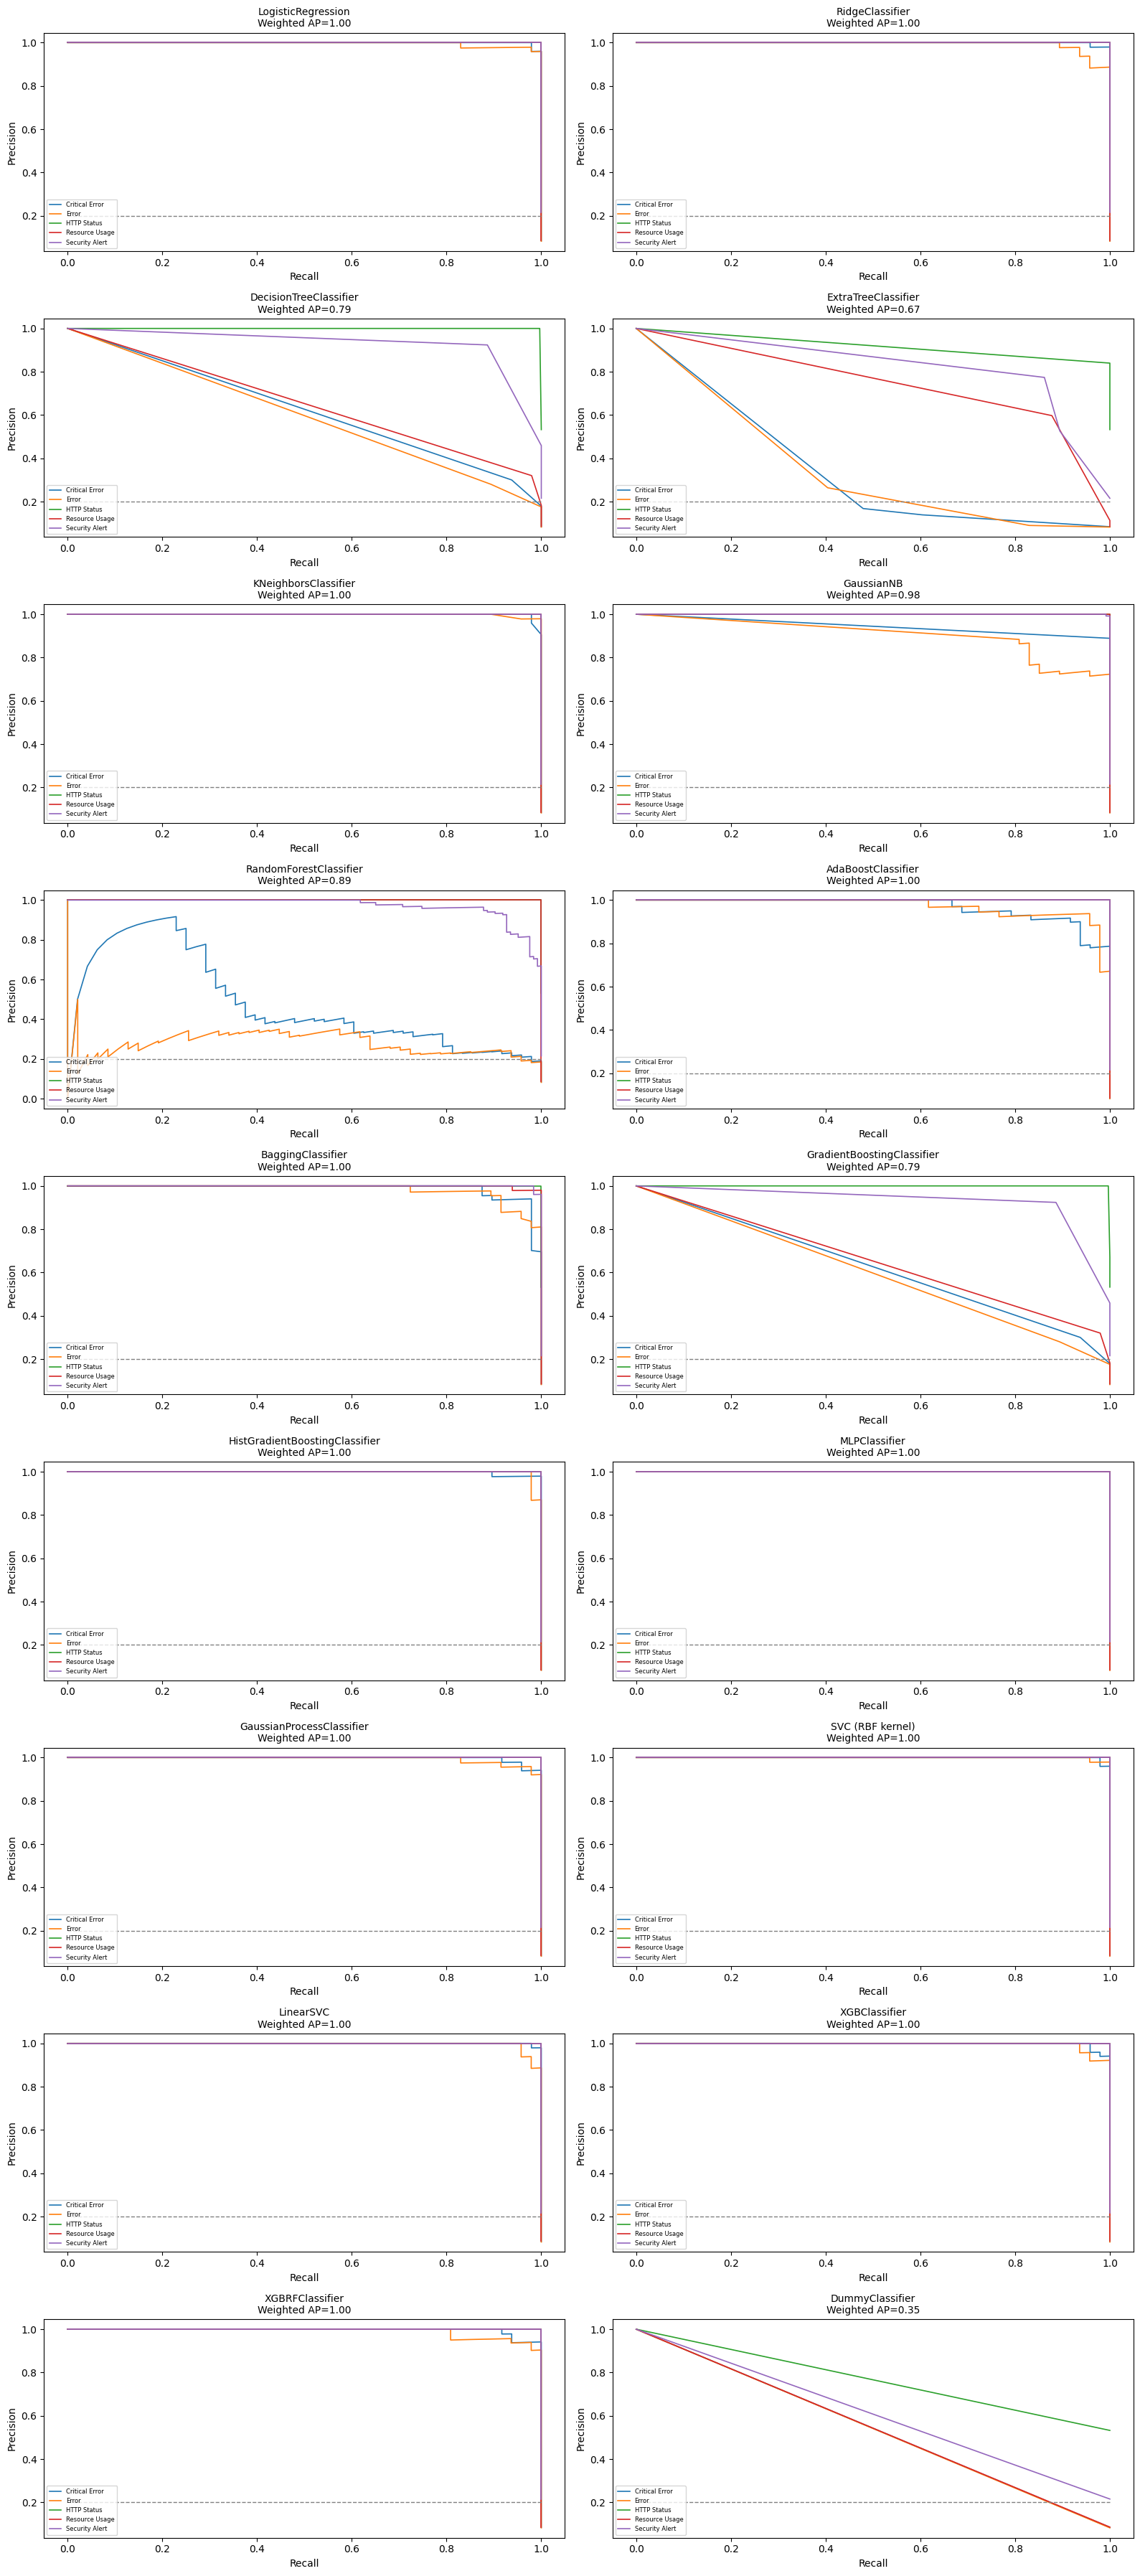

In [28]:

avg_precision_weighted = {}

# Create figure with 9 rows and 2 columns (18 models max)
fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(16, 36))
axes = axes.ravel()

for idx, (name, model) in enumerate(models_dist.items()):
    try:
        # === Special handling for XGBoost ===
        if name in ["XGBClassifier", "XGBRFClassifier"]:
            model.fit(X_train, y_train_xgb)
            y_predict = model.predict(X_test)
            y_pred = label_encoder.inverse_transform(y_predict)
        else:
            if name == "LinearSVC":
                model = OneVsRestClassifier(model)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

        print(f"\n====== {name} ======")
        print(classification_report(y_test, y_pred))

        # === Get probability/decision scores ===
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test)
        else:
            y_score = model.decision_function(X_test)

        # Binary classification fix
        if y_score.ndim == 1:
            y_score = np.column_stack([1 - y_score, y_score])

        # === Weighted Average Precision ===
        avg_prec = average_precision_score(y_test_bin, y_score, average="weighted")
        avg_precision_weighted[name] = avg_prec

        # === Plot Precision-Recall Curves ===
        ax = axes[idx]
        for i in range(n_classes):
            precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
            ax.plot(recall, precision, lw=1.2, label=f"{classes[i]}")

        # Baseline: prevalence of positive class
        prevalence = y_test_bin.mean()
        ax.hlines(prevalence, 0, 1, colors="gray", linestyles="--", lw=1)

        ax.set_title(f"{name}\nWeighted AP={avg_prec:.2f}", fontsize=10)
        ax.set_xlabel("Recall")
        ax.set_ylabel("Precision")
        ax.legend(fontsize=6, loc="lower left")

    except Exception as e:
        print(f"Skipping {name}: {e}")

plt.tight_layout()
plt.show()

In [ ]:
fig.savefig('precision_recall_curve')

In [30]:
print("\n=== AUC Scores by Model (sorted) ===")
for model, score in sorted(avg_precision_weighted.items(), key=lambda x: x[1], reverse=True):
    print(f"{model}: {score:.4f}")


=== AUC Scores by Model (sorted) ===
MLPClassifier: 1.0000
SVC (RBF kernel): 0.9999
LinearSVC: 0.9997
KNeighborsClassifier: 0.9996
HistGradientBoostingClassifier: 0.9996
LogisticRegression: 0.9996
XGBClassifier: 0.9995
RidgeClassifier: 0.9993
GaussianProcessClassifier: 0.9992
XGBRFClassifier: 0.9988
BaggingClassifier: 0.9972
AdaBoostClassifier: 0.9950
GaussianNB: 0.9790
RandomForestClassifier: 0.8922
GradientBoostingClassifier: 0.7933
DecisionTreeClassifier: 0.7931
ExtraTreeClassifier: 0.6696
DummyClassifier: 0.3511


### ✅ Conclusion

- Based on the model evaluation so far, `LogisticRegression` has performed exceptionally well, achieving both high accuracy and maintaining scalability.

- Compared to other models, it strikes the right balance between speed, generalization, and robustness on the dataset.

- Given its performance and efficiency, `LogisticRegression` can be considered a strong candidate for deployment in scenarios where fast and scalable solutions are required.

### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier, OutputCodeClassifier
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt

# 1. Define base classifier
clf = LogisticRegression(max_iter=500, solver="saga")  # saga works with l1/l2/elasticnet

# 2. Param grid (valid for LogisticRegression)
param_grid = {
    "penalty": ["l1", "l2", "elasticnet", None],
    "C": [0.01, 0.1, 1, 10],              # inverse of regularization strength
    "l1_ratio": [None, 0.1, 0.5, 0.9],   # only used if elasticnet
    "class_weight": [None, "balanced"],
}

In [ ]:

# 3. Grid search
optimized_model = GridSearchCV(
    clf,
    param_grid,
    cv=5,
    scoring="f1_weighted",
    n_jobs=-1,
    verbose=1
)

optimized_model.fit(X_train, y_train)

print("✅ Best params:", optimized_model.best_params_)


Fitting 5 folds for each of 15552 candidates, totalling 77760 fits


In [ ]:
# 4. Use best model
best_params = optimized_model.best_params_
base_model = LogisticRegression(**best_params, random_state=42)
base_model.fit(X_train, y_train)

y_pred = base_model.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
# 5. Compare multiclass strategies with tuned model
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=5, random_state=0)

ovo_model = OneVsOneClassifier(base_model)
ovr_model = OneVsRestClassifier(base_model)
ecoc_model = OutputCodeClassifier(base_model, code_size=2)

cv_results_ovo = cross_validate(ovo_model, X, y, cv=cv, n_jobs=-1, scoring="f1_weighted")
cv_results_ovr = cross_validate(ovr_model, X, y, cv=cv, n_jobs=-1, scoring="f1_weighted")
cv_results_ecoc = cross_validate(ecoc_model, X, y, cv=cv, n_jobs=-1, scoring="f1_weighted")

scores = pd.DataFrame(
    {
        "OneVsOne": cv_results_ovo["test_score"],
        "OneVsRest": cv_results_ovr["test_score"],
        "ECOC": cv_results_ecoc["test_score"],
    }
)

ax = scores.plot.kde(legend=True)
ax.set_xlabel("F1-weighted score")
ax.set_xlim([0, 1])
ax.set_title("Density of F1-weighted scores for multiclass strategies")
plt.show()


In [ ]:
# y_score = final_model.predict_proba(X_test)
# y_score

AttributeError: This 'SVC' has no attribute 'predict_proba'

In [50]:
print(np.max(y_score),np.min(y_score))

1.977826181444296 -2.325184766817261


In [37]:
import joblib

joblib.dump(final_model, "../models/log_classifier.joblib")

['../models/log_classifier.joblib']

## `Stage: 3` - Classification using **`LLMs`**

In [34]:
df.head()

,timestamp,source,log_message,target_label,cluster,regex_label
0,27-06-2025 07:20,ModernCRM,nova.osapi_compute.wsgi.server [req-b9718cd8-f...,HTTP Status,0,None
1,1/14/2025 23:07,ModernCRM,Email service experiencing issues with sending,Critical Error,1,None
2,1/17/2025 1:29,AnalyticsEngine,Unauthorized access to data was attempted,Security Alert,2,None
3,12-07-2025 00:24,ModernHR,nova.osapi_compute.wsgi.server [req-4895c258-b...,HTTP Status,0,None
4,02-06-2025 18:25,BillingSystem,nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...,HTTP Status,0,None


In [37]:
df[df['source'] == "ModernCRM"].head()

,timestamp,source,log_message,target_label,cluster,regex_label
0,27-06-2025 07:20,ModernCRM,nova.osapi_compute.wsgi.server [req-b9718cd8-f...,HTTP Status,0,None
1,1/14/2025 23:07,ModernCRM,Email service experiencing issues with sending,Critical Error,1,None
10,08-09-2025 18:58,ModernCRM,Email server encountered a sending fault,Error,1,None
15,05-01-2025 09:41,ModernCRM,Backup completed successfully.,System Notification,8,System Notification
17,27-01-2025 12:39,ModernCRM,nova.osapi_compute.wsgi.server [req-5f1c2027-e...,HTTP Status,0,None


In [48]:
data = df[df['target_label'] == 'HTTP Status'].loc[:,'log_message'].tolist()

In [45]:
pd.DataFrame(y).value_counts()

0             
HTTP Status       1017
Security Alert     371
Error              177
Resource Usage     177
Critical Error     161
Name: count, dtype: int64